In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# idee

NLP:
    - pos tagging per contare numero di aggettivi 
    - qualcosa per vedere se aggettivi sono positivi o negativi (direttamente sentiment analysis)?
    - rimuovere gli @ vs tenere solo i più frequenti 
    - rimuovere i link
    - pulire gli hashtag? 
    - word2vec distance per avere simili tweet assieme nello spazio vettoriale?
    - ridurre parole presenti? 
    - tfidf?
    
Processo:
    - clustering interno all'anno
    - clustering generale 
    - clustering con/senza sentiment meaning

In [2]:
data = pd.read_json("dataWithTags.json")
data['created_at'] = pd.to_datetime(data.created_at, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
data.reset_index(inplace=True,drop=True)
data

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,modded_text,@johnboehner,...,@trumpdoral,@dianejackson9,@toure,@floydmayweather,@10ajmccarron,@rspbscotland,@newyorkgop,@mattginellagc,@foxandfriends,@cnn
0,2009-05-04 18:54:25,202,1698308935,NaN,False,253,Twitter Web Client,Be sure to tune in and watch Donald Trump on L...,be sure to tune in and watch donald trump on l...,0,...,0,0,0,0,0,0,0,0,0,0
1,2009-05-05 01:00:10,3,1701461182,NaN,False,2,Twitter Web Client,Donald Trump will be appearing on The View tom...,donald trump will be appearing on the view tom...,0,...,0,0,0,0,0,0,0,0,0,0
2,2009-05-08 13:38:08,2,1737479987,NaN,False,3,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,donald trump reads top ten financial tips on l...,0,...,0,0,0,0,0,0,0,0,0,0
3,2009-05-08 20:40:15,27,1741160716,NaN,False,8,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale and ...,0,...,0,0,0,0,0,0,0,0,0,0
4,2009-05-12 14:07:28,1950,1773561338,NaN,False,1421,Twitter Web Client,"""My persona will never be that of a wallflower...",my persona will never be that of a wallflower ...,0,...,0,0,0,0,0,0,0,0,0,0
5,2009-05-12 19:21:55,13,1776419923,NaN,False,10,Twitter Web Client,"Miss USA Tara Conner will not be fired - ""I've...",miss usa tara conner will not be fired ive al...,0,...,0,0,0,0,0,0,0,0,0,0
6,2009-05-13 17:38:28,10,1786560616,NaN,False,11,Twitter Web Client,Listen to an interview with Donald Trump discu...,listen to an interview with donald trump discu...,0,...,0,0,0,0,0,0,0,0,0,0
7,2009-05-14 16:30:40,6,1796477499,NaN,False,3,Twitter Web Client,"""Strive for wholeness and keep your sense of w...",strive for wholeness and keep your sense of wo...,0,...,0,0,0,0,0,0,0,0,0,0
8,2009-05-15 14:13:13,2,1806258917,NaN,False,1,Twitter Web Client,"Enter the ""Think Like A Champion"" signed book ...",enter the think like a champion signed book an...,0,...,0,0,0,0,0,0,0,0,0,0
9,2009-05-16 22:22:45,5,1820624395,NaN,False,3,Twitter Web Client,"""When the achiever achieves, it's not a platea...",when the achiever achieves its not a plateau i...,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#exploit time
data['month'] = [d.month for d in data['created_at']]
data["year"] = [d.year for d in data["created_at"]]
data["hour"] = [d.hour for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]

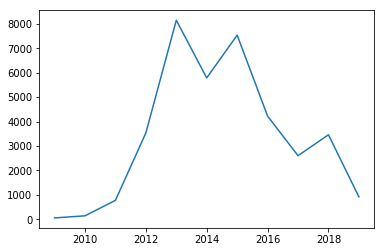

In [4]:
temp = data.groupby(["year"])["year"].count()
plt.plot(temp)

annuncio campagna elettorale giugno 2015

In [5]:
temp = pd.DataFrame({'count' : data.groupby( [ "year", "month"] ).size()}).reset_index()
temp

#plotta nel corso dei mesi il numero di tweet per anni, devi prendere i dati per ogni anno e farli di lunghezza uguale come array e poi plotti 

,year,month,count
0,2009,5,21
1,2009,6,11
2,2009,7,5
3,2009,8,7
4,2009,9,3
5,2009,10,4
6,2009,11,3
7,2009,12,2
8,2010,1,4
9,2010,2,4


In [13]:
l = []
for year in temp["year"].unique().tolist():
    l1 = [0] * 12
    t = temp[temp["year"] == year]
    for idx,row in t.iterrows():
        l1[row["month"]-1] = row["count"]
    l.append(l1)
l

[[0, 0, 0, 0, 21, 11, 5, 7, 3, 4, 3, 2],
 [4, 4, 10, 18, 17, 17, 13, 16, 13, 9, 11, 10],
 [9, 16, 36, 5, 13, 16, 73, 94, 110, 106, 112, 184],
 [162, 225, 177, 174, 224, 184, 203, 333, 345, 642, 490, 372],
 [721, 893, 826, 902, 781, 463, 865, 716, 673, 558, 377, 369],
 [358, 284, 377, 512, 364, 748, 468, 334, 497, 609, 574, 659],
 [1119, 468, 404, 798, 707, 529, 789, 355, 409, 790, 575, 591],
 [491, 494, 440, 284, 351, 303, 378, 325, 296, 530, 193, 138],
 [214, 154, 147, 152, 155, 212, 245, 267, 306, 290, 261, 199],
 [150, 175, 170, 256, 259, 382, 334, 366, 368, 368, 336, 295],
 [357, 239, 319, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

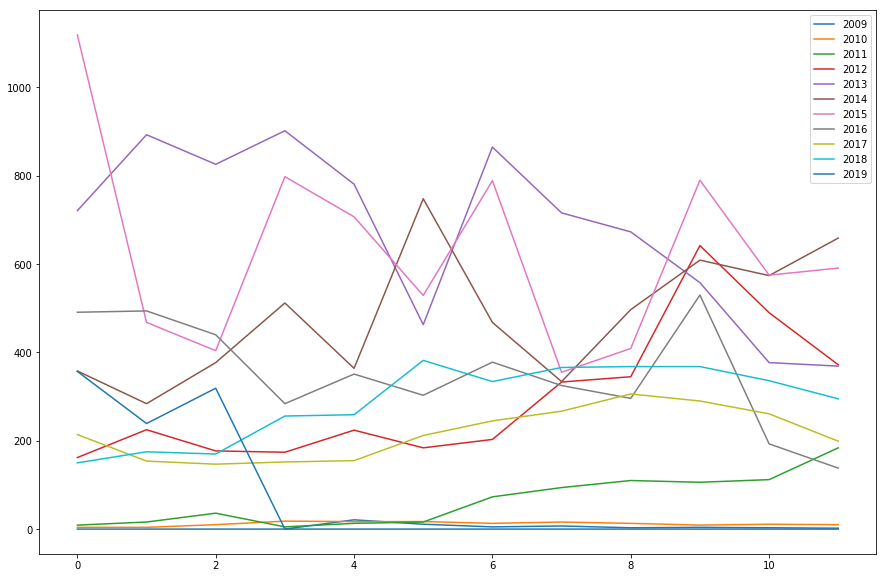

In [33]:
leg = temp["year"].unique().tolist()
fig, ax = plt.subplots(figsize = (15, 10))
months = [x for x in range(0,12)]
for i in range(0,len(l)):
    plt.plot(months, l[i],label = leg[i])
plt.legend()

In [45]:
data.drop(['created_at', 'text',"modded_text","id_str","is_retweet","in_reply_to_user_id_str","source"], axis=1,inplace=True) 


KeyError: "['created_at' 'text' 'modded_text' 'id_str' 'is_retweet'\n 'in_reply_to_user_id_str' 'source'] not found in axis"

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37164 entries, 0 to 37163
Data columns (total 62 columns):
favorite_count      37164 non-null int64
retweet_count       37164 non-null int64
@johnboehner        37164 non-null int64
@barackobama        37164 non-null int64
@karlrove           37164 non-null int64
@ivankatrump        37164 non-null int64
@jonhuntsman        37164 non-null int64
@mittromney         37164 non-null int64
@the                37164 non-null int64
@ricksantorum       37164 non-null int64
@melaniatrump       37164 non-null int64
@dennisrodman       37164 non-null int64
@jeff               37164 non-null int64
@neanderthalman1    37164 non-null int64
@michellemalkin     37164 non-null int64
@mcuban             37164 non-null int64
@riggs              37164 non-null int64
@realdonaldtrump    37164 non-null int64
@nathalies          37164 non-null int64
@piersmorgan        37164 non-null int64
@lord               37164 non-null int64
@jnorr11            37164 non-

# tentativo di clustering su feature demmerda (inutile al chezzo ma vabe il codice è pronto)


In [52]:
from sklearn import preprocessing
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.000319,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.782609,0.346154
1,0.000005,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.043478,0.346154
2,0.000003,0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.565217,0.346154
3,0.000043,0.000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.869565,0.346154
4,0.003079,0.003845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.608696,0.365385


In [53]:
kmeans = KMeans(n_clusters=2).fit(df)

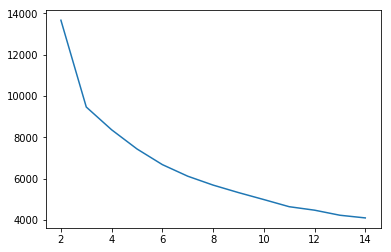

In [57]:
sse_list = list()
max_k = 15
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()


In [66]:
kmeans = KMeans(n_clusters=40).fit(df)

In [67]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers',kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)

centers [[ 1.00230352e-03  6.02331555e-04 -1.62630326e-19 ...  5.29629630e-01
   1.20947034e-01  3.00377300e-01]
 [ 7.38570573e-02  3.48319571e-02 -1.62630326e-19 ...  7.68671875e-01
   8.70176630e-01  5.95147236e-01]
 [ 5.60511429e-03  3.55435920e-03 -1.62630326e-19 ...  5.44971382e-01
   5.38056810e-01  2.66353230e-01]
 ...
 [ 6.97144482e-04  5.70331888e-04 -1.62630326e-19 ...  5.02032520e-01
   9.19288323e-01  3.81436314e-01]
 [ 4.76575034e-03  3.03954664e-03 -1.62630326e-19 ...  5.22552448e-01
   9.58878078e-02  3.66107450e-01]
 [ 4.20267269e-04  1.06989978e-03  1.10619469e-03 ...  3.66758850e-01
   8.60066372e-01  8.77286845e-01]]
labels {0: 999, 1: 1280, 2: 1223, 3: 1784, 4: 860, 5: 1544, 6: 552, 7: 884, 8: 1307, 9: 997, 10: 1564, 11: 1311, 12: 2744, 13: 199, 14: 156, 15: 842, 16: 250, 17: 900, 18: 736, 19: 1292, 20: 177, 21: 715, 22: 936, 23: 155, 24: 111, 25: 442, 26: 1224, 27: 911, 28: 1152, 29: 67, 30: 127, 31: 1379, 32: 965, 33: 1295, 34: 64, 35: 878, 36: 1452, 37: 738, 38: 